<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-background-information" data-toc-modified-id="Getting-background-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting background information</a></span></li><li><span><a href="#Step1:-Checking-the-data" data-toc-modified-id="Step1:-Checking-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step1: Checking the data</a></span><ul class="toc-item"><li><span><a href="#We-can-start-to-see-some-useful-patterns-in-the-datasets:" data-toc-modified-id="We-can-start-to-see-some-useful-patterns-in-the-datasets:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>We can start to see some useful patterns in the datasets:</a></span></li></ul></li><li><span><a href="#Step2:-Unifying-the-data" data-toc-modified-id="Step2:-Unifying-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step2: Unifying the data</a></span><ul class="toc-item"><li><span><a href="#Adding-in-the-surveys" data-toc-modified-id="Adding-in-the-surveys-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adding in the surveys</a></span></li></ul></li><li><span><a href="#Step3:-Condensing-datasets" data-toc-modified-id="Step3:-Condensing-datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step3: Condensing datasets</a></span><ul class="toc-item"><li><span><a href="#Condensing-other-datasets" data-toc-modified-id="Condensing-other-datasets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Condensing other datasets</a></span></li></ul></li><li><span><a href="#Step4:-Computing-variables" data-toc-modified-id="Step4:-Computing-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step4: Computing variables</a></span></li><li><span><a href="#Step5:-Combining-the-datasets" data-toc-modified-id="Step5:-Combining-the-datasets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step5: Combining the datasets</a></span><ul class="toc-item"><li><span><a href="#Adding-in-values" data-toc-modified-id="Adding-in-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Adding in values</a></span></li></ul></li></ul></div>

## Getting background information

Before diving into analyzing the data, it's useful to research some background information. In this case, we know a few facts that will be useful:

* New York City is divided into 5 boroughs, which are essentially distinct regions.
* Schools in New York City are divided into several school district, each of which can contains dozens of schools.
* Not all the schools in all of the datasets are high schools, so we'll need to do some data cleaning.
* Each school in New York City has a unique code called a DBN, or District Borough Number.
* By aggregating data by district, we can use the district mapping data to plot district-by-district differences.

## Step1: Checking the data
We can run some code to read in the data. We’ll be using Jupyter notebook to explore the data. The below code will:
* Loop through each data file we downloaded.
* Read the file into a Pandas DataFrame.
* Put each DataFrame into a Python dictionary.

In [1]:
import pandas
import numpy as np

# Ceeates a list named files
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

data = {}
# Loop through each data file
for f in files:
    # Read the file into Pandas DataFrame
    d = pandas.read_csv('{0}'.format(f),error_bad_lines=False) #To deal with undesired commas inside the data.
    # Put each DataFrame into a Python dictionary.
    data[f.replace(".csv", "")] = d

Skipping line 33: expected 64 fields, saw 78
Skipping line 34: expected 64 fields, saw 78
Skipping line 35: expected 64 fields, saw 78
Skipping line 36: expected 64 fields, saw 78
Skipping line 37: expected 64 fields, saw 78
Skipping line 38: expected 64 fields, saw 78
Skipping line 39: expected 64 fields, saw 78
Skipping line 40: expected 64 fields, saw 78
Skipping line 41: expected 64 fields, saw 78
Skipping line 42: expected 64 fields, saw 78
Skipping line 43: expected 64 fields, saw 78
Skipping line 44: expected 64 fields, saw 78
Skipping line 45: expected 64 fields, saw 78
Skipping line 46: expected 64 fields, saw 78
Skipping line 47: expected 64 fields, saw 78
Skipping line 48: expected 64 fields, saw 78
Skipping line 129: expected 64 fields, saw 70
Skipping line 130: expected 64 fields, saw 70
Skipping line 131: expected 64 fields, saw 70
Skipping line 132: expected 64 fields, saw 70
Skipping line 133: expected 64 fields, saw 70
Skipping line 134: expected 64 fields, saw 70
Skip

In [2]:
# Found misconversion in GRADE field
# To fix this problem, read the file in Excel and fixed then backed in csv format
class_size = pandas.read_excel('class_size.xls', 'class_size', index_col=[0])
class_size.to_csv('class_size.csv', encoding='utf-8')
class_size=pandas.read_csv('class_size.csv')
data["class_size"] = class_size

Once we’ve read the data in, we can use the head method on DataFrames to print the first 5 lines of each DataFrame:

In [3]:
# For eaxh key and value in data dictionary, print key and 5 lines of value
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


math_test_results

      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   
3  01M015     3  2009  All Students             33              668         0   
4  01M015     3  2010  All Students             26              677         6   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0       5.1        11      28.2        20      51.3         6      15.4   
1       6.5         3       9.7        22        71         4      12.9   
2         0         6      16.2        29      78.4         2       5.4   
3         0         4      12.1        28      84.8         1         3   
4      23.1        12      46.2         6      23.1         2       7.7   

  Level 3+4 # Level 3+4 %  
0          26 

### We can start to see some useful patterns in the datasets:
* Most of the datasets contain a DBN column
* Some fields look interesting for mapping, particularly Location 1, which contains coordinates inside a larger string.
* Some of the datasets appear to contain multiple rows for each school (repeated DBN values), which means we'll have to do some preprocessing.

## Step2: Unifying the data
* In order to work with the data more easily, we'll need to unify all the individual datasets into a single one. This will enable us to quickly compare columns across datasets. In order to do this, we'll first need to find a common column to unify them on. Looking at the output above, it appears that DBN might be that common column, as it appears in multiple datasets.
* Google search of DBN New York City Schools revealed that the DBN is a unique code for each school. 
* The problem now is that two of the datasets, class_size, and hs_directory, don't have a DBN field. In the hs_directory data, it's just named dbn, so we can just rename the column, or copy it over into a new column called DBN. In the class_size data, we'll need to try a different approach.
* The DBN column looks like this:

In [4]:
data["demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

If we look at the class_size data, here's what we'd see in the first 5 rows:

In [5]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,2019-01-01 00:00:00,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,2019-01-01 00:00:00,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,2019-01-02 00:00:00,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


As you can see above, it looks like the DBN is actually a combination of CSD, BOROUGH, and SCHOOL CODE. DBN stands for District Borough Number. It looks like CSD is the District, BOROUGH is the borough, and when combined with the SCHOOL CODE, forms the DBN. 
Now that we know how to construct the DBN, we can add it into the class_size and hs_directory datasets:

In [6]:
# Construct the DBN and add it into the class_size by combing CSD and SCHOOL CODE and 
# padded with zeros to provide consistent output.
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

### Adding in the surveys
One of the most potentially interesting datasets to look at is the dataset on student, parent, and teacher surveys about the quality of schools. These surveys include information about the perceived safety of each school, academic standards, and more. Before we combine our datasets, let's add in the survey data. 
In this case, we'll add the survey data into our data dictionary, and then combine all the datasets afterwards. The survey data consists of 2 files, one for all schools, and one for school district 75. We'll need to write some code to combine them. In the below code, we'll:

In [7]:
# Read in the surveys for all schools using the windows-1252 file encoding.
survey1 = pandas.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
# Read in the surveys for district 75 schools using the windows-1252 file encoding.
survey2 = pandas.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')
# Add a flag that indicates which school district each dataset is for.
survey1["d75"] = False
survey2["d75"] = True
# Combine the datasets into one using the concat method on DataFrames.
survey = pandas.concat([survey1, survey2], axis=0, sort=True)

Once we have the surveys combined, there's an additional complication. We want to minimize the number of columns in our combined dataset so we can easily compare columns and figure out correlations. Unfortunately, the survey data has many columns that aren't very useful to us:

In [8]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


We can resolve this issue by looking at the data dictionary file that we downloaded along with the survey data. The file tells us the important fields in the data:

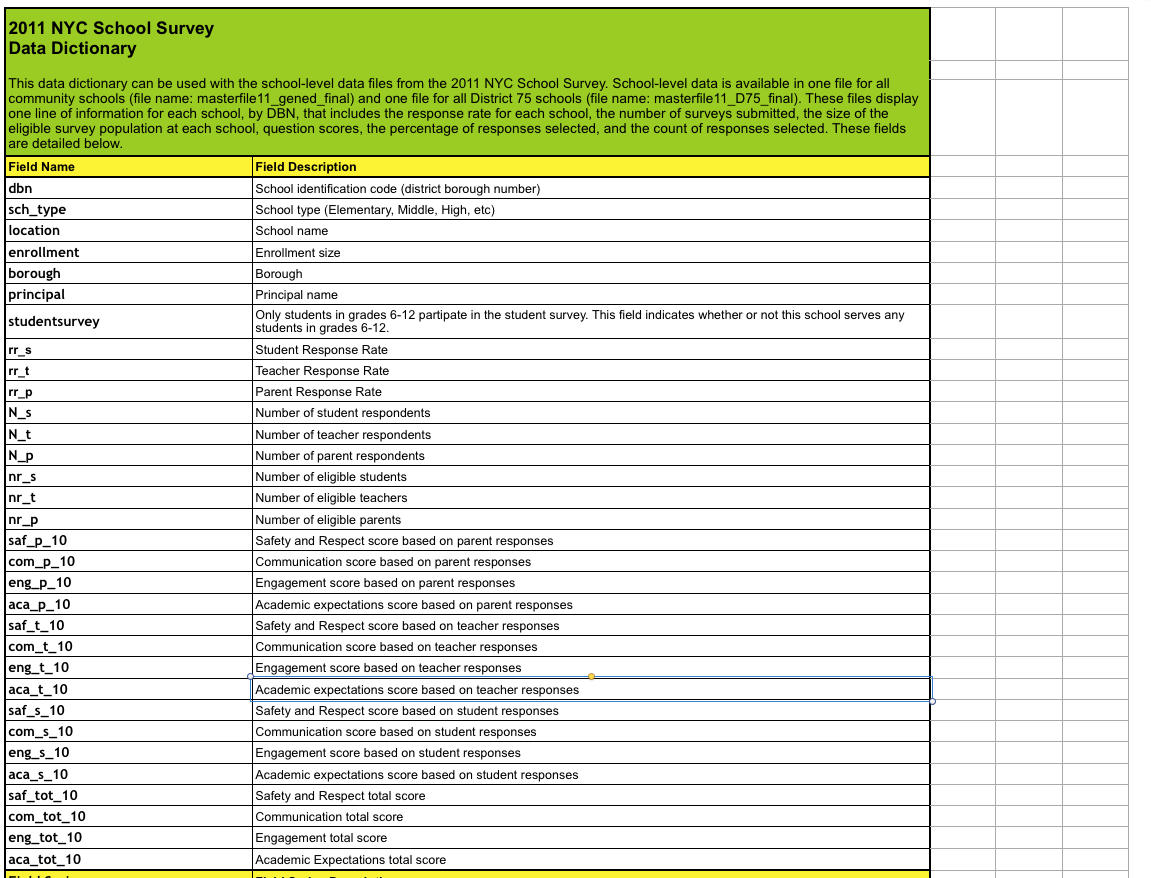
We can then remove any extraneous columns in survey:

In [9]:
survey["DBN"] = survey["dbn"]
# Specify important fields in the data
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
# Replace extraneous columns with important fields
survey = survey.reindex(columns=survey_fields)
# Add the survey data into the data dictionary
data["survey"] = survey
# Make sure the dataset contains only the relevant columns
survey.shape

(1702, 23)

## Step3: Condensing datasets
If we take a look at some of the datasets, including class_size, we'll immediately see a problem:

In [10]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,2019-01-01 00:00:00,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,2019-01-01 00:00:00,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,2019-01-02 00:00:00,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


There are several rows for each high school (as you can see by the repeated DBN and SCHOOL NAME fields). However, if we take a look at the sat_results dataset, it only has one row per high school:

In [11]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In order to combine these datasets, we'll need to find a way to condense datasets like class_size to the point where there's only a single row per high school. If not, there won't be a way to compare SAT scores to class size. We can accomplish this by first understanding the data better, then by doing some aggregation. With the class_size dataset, it looks like GRADE and PROGRAM TYPE have multiple values for each school. By restricting each field to a single value, we can filter most of the duplicate rows. In the below code, we:
* Only select values from class_size where the GRADE field is 09-12.
* Only select values from class_size where the PROGRAM TYPE field is GEN ED.
* Group the class_size dataset by DBN, and take the average of each column. Essentially, we'll find the average class_size values for each school.
* Reset the index, so DBN is added back in as a column.

In [12]:
class_size = data["class_size"]
# Only select values from class_size where GRADE field has 09_12
class_size = class_size[class_size["GRADE "].str.contains("09-12", na=False)]
# Only select value from class_size where PROGRAM TYPE field is GEN ED.
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
# Group the class_size dataset by DBN,and take the average of each column.
#This means the average class_size value for each school.
class_size = class_size.groupby("DBN").agg(np.mean)
# Reset the index, so DBN is added back in as a column.
class_size.reset_index(inplace=True)
data["class_size"] = class_size

### Condensing other datasets
Next, we'll need to condense the demographics dataset. The data was collected for multiple years for the same schools, so there are duplicate rows for each school. We'll only pick rows where the schoolyear field is the most recent available:

In [13]:
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


We'll need to condense the math_test_results dataset. This dataset is segmented by Grade and by Year. We can select only a single grade from a single year:

In [14]:
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']
data["math_test_results"].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
111,01M034,8,2011,All Students,48,646,15,31.3,22,45.8,11,22.9,0,0,11,22.9
280,01M140,8,2011,All Students,61,665,1,1.6,43,70.5,17,27.9,0,0,17,27.9
346,01M184,8,2011,All Students,49,727,0,0,0,0,5,10.2,44,89.8,49,100
388,01M188,8,2011,All Students,49,658,10,20.4,26,53.1,10,20.4,3,6.1,13,26.5
411,01M292,8,2011,All Students,49,650,15,30.6,25,51,7,14.3,2,4.1,9,18.4


Finally, graduation needs to be condensed:

In [15]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21,14,7.3,13.3,53,27.5,35,18.1


## Step4: Computing variables
Computing variables can help speed up our analysis by enabling us to make comparisons more quickly, and enable us to make comparisons that we otherwise wouldn't be able to do. The first thing we can do is compute a total SAT score from the individual columns SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score. In the below code, we:
* Convert each of the SAT score columns from a string to a number.
* Add together all of the columns to get the sat_score column, which is the total SAT score.

In [16]:
import pandas as pd

cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


Next, we'll need to parse out the coordinate locations of each school, so we can make maps. This will enable us to plot the location of each school. In the below code, we:
* Parse latitude and longitude columns from the Location 1 column.
* Convert lat and lon to be numeric.

In [17]:
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    data["hs_directory"][c] =  pd.to_numeric(data["hs_directory"][c], errors='coerce')

Now, we can print out each dataset to see what we have:

In [18]:
for k,v in data.items():
    print(k)
    print(v.head())

math_test_results
        DBN Grade  Year      Category  Number Tested Mean Scale Score  \
111  01M034     8  2011  All Students             48              646   
280  01M140     8  2011  All Students             61              665   
346  01M184     8  2011  All Students             49              727   
388  01M188     8  2011  All Students             49              658   
411  01M292     8  2011  All Students             49              650   

    Level 1 # Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 #  \
111        15      31.3        22      45.8        11      22.9         0   
280         1       1.6        43      70.5        17      27.9         0   
346         0         0         0         0         5      10.2        44   
388        10      20.4        26      53.1        10      20.4         3   
411        15      30.6        25        51         7      14.3         2   

    Level 4 % Level 3+4 # Level 3+4 %  
111         0          11        22.9  


## Step5: Combining the datasets
Now that we've done all the preliminaries, we can combine the datasets together using the DBN column. When we join them, it's important to note that some of the datasets are missing high schools that exist in the sat_results dataset. To resolve this, we'll need to merge the datasets that have missing rows using the outer join strategy, so we don't lose data.  
In the below code, we'll:
* Loop through each of the items in the data dictionary.
* Print the number of non-unique DBNs in the item.
* Decide on a join strategy -- inner or outer.
* Join the item to the DataFrame full using the column DBN.

In [19]:
# Loop through each of the items in the data dictionary
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
# Join the item to the DataFrame full using the column DBN
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    # Print the number of non-unique DBNs in the item
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    # Merge the datasets that have missing rows using the outer join strategy
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        # Join the item to the DataFrame full using the column DBN
        full = full.merge(f, on="DBN", how=join_type)

full.shape

sat_results
0
demographics
0
graduation
0
hs_directory
0
ap_2010
1
survey
0
class_size
0


(385, 180)

### Adding in values
Now that we have our full DataFrame, we have almost all the information we'll need to do our analysis. There are a few missing pieces, though. We may want to correlate the Advanced Placement exam results with SAT scores, but we'll need to first convert those columns to numbers, then fill in any missing values:

In [20]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] =  pd.to_numeric(full[col], errors='coerce')

full[cols] = full[cols].fillna(value=0)

Then, we'll need to calculate a school_dist column that indicates the school district of the school. This will enable us to match up school districts and plot out district-level statistics using the district maps we downloaded earlier:

In [21]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Finally, we'll need to fill in any missing values in full with the mean of the column, so we can compute correlations:

In [22]:
full = full.fillna(full.mean())

Store the consolidated dataset in csv format.

In [23]:
full.to_csv('full.csv')